# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
plt.rcParams['figure.dpi'] = 300

In [2]:
a = np.array([0.1,.05,0.6])
b = np.array([0.7,.05,0.1])
a_index = (a>0.5).nonzero()
b_index = (b<0.5).nonzero()
np.intersect1d(a_index, b_index)

array([2], dtype=int64)

In [3]:
def specificity_score(y_true, y_predict):
    from sklearn.metrics import confusion_matrix
    conf = confusion_matrix(y_true=y_true, y_pred=y_predict)
    return conf[0,0]/(conf[0,0]+conf[0, 1])

def opt_score(y_true, y_predict):
    target1_pro = 0.919271
    target0_pro = 1 - target1_pro
    
    opt_score = specificity_score(y_true, y_predict)*target1_pro*0.03 - (1-recall_score(y_true, y_predict))*target0_pro
    return (opt_score+0.1)*5

def opt_score2(y_true, y_predict, x_train):
    import numpy as np
    pos_index = (y_predict > 0.5).nonzero()
    neg_index = (y_predict < 0.5).nonzero()
    true_index = (y_true == 1).nonzero()
    false_index = (y_true == 0).nonzero()
    
    # specificity 
    s_index = np.intersect1d(neg_index, false_index)
    s_loss = x_train[s_index,3].sum() # annuty
    # (1-recall)
    invr_index = np.intersect1d(neg_index, true_index)
    invr_loss = x_train[invr_index, 2].sum() # credict
    
    return (s_loss - invr_loss)/x_train.shape[0]

In [4]:
df = pd.read_csv('preprocessed_data_2.csv')
print('head')
display(df.head())
print('tail')
display(df.tail())

df = df.drop(['Unnamed: 0', 'SK_ID_CURR'], axis = 1)
X_col = df.drop('TARGET', axis = 1).columns
df.TARGET.value_counts()

head


,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-3039.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-3038.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


tail


,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
307506,307506,456251.0,0.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,307507,456252.0,0.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,365243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,307508,456253.0,0.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-7921.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,307509,456254.0,1.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-4786.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307510,307510,456255.0,0.0,0.0,157500.0,675000.0,49117.5,675000.0,0.046220,-1262.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0.0    282686
1.0     24825
Name: TARGET, dtype: int64

## Imbalanced Data

In [5]:
with open('pickle/imbalanced_data.pickle', 'rb') as f:
    under_data = pickle.load(f)
    
X2_subtrain = under_data['X_subtrain']
X2_valid = under_data['X_valid']
y2_subtrain = under_data['y_subtrain']
y2_valid = under_data['y_valid']
X2_test = under_data['X_test']
y2_test = under_data['y_test']

In [30]:
accuracies = []
recalls = []
f1s = []
precisions = []
opts = []
specificities = []

alpha_grids = np.logspace(-4, -2, 6)
alpha_results = {}
for alpha in alpha_grids:
    d_tree = DecisionTreeClassifier(ccp_alpha = alpha)
    d_tree.fit(X2_subtrain, y2_subtrain)
    prediction = d_tree.predict(X2_valid)
    
    accuracies.append(accuracy_score(y2_valid, prediction))
    recalls.append(recall_score(y2_valid, prediction))
    f1s.append(f1_score(y2_valid, prediction))
    precisions.append(precision_score(y2_valid, prediction))
    specificities.append(specificity_score(y2_valid, prediction))
    opts.append(opt_score(y2_valid, prediction))

,Number of Trees,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,0.000100,0.633548,0.632820,0.627811,0.630305,0.639230,0.437912
1,0.000251,0.650107,0.650438,0.641662,0.646020,0.658471,0.446156
2,0.000631,0.649212,0.654484,0.624933,0.639367,0.673259,0.441442
3,0.001585,0.637397,0.636842,0.631229,0.634023,0.643506,0.439881
4,0.003981,0.637397,0.636842,0.631229,0.634023,0.643506,0.439881
5,0.010000,0.631042,0.607479,0.730527,0.663345,0.532514,0.464657


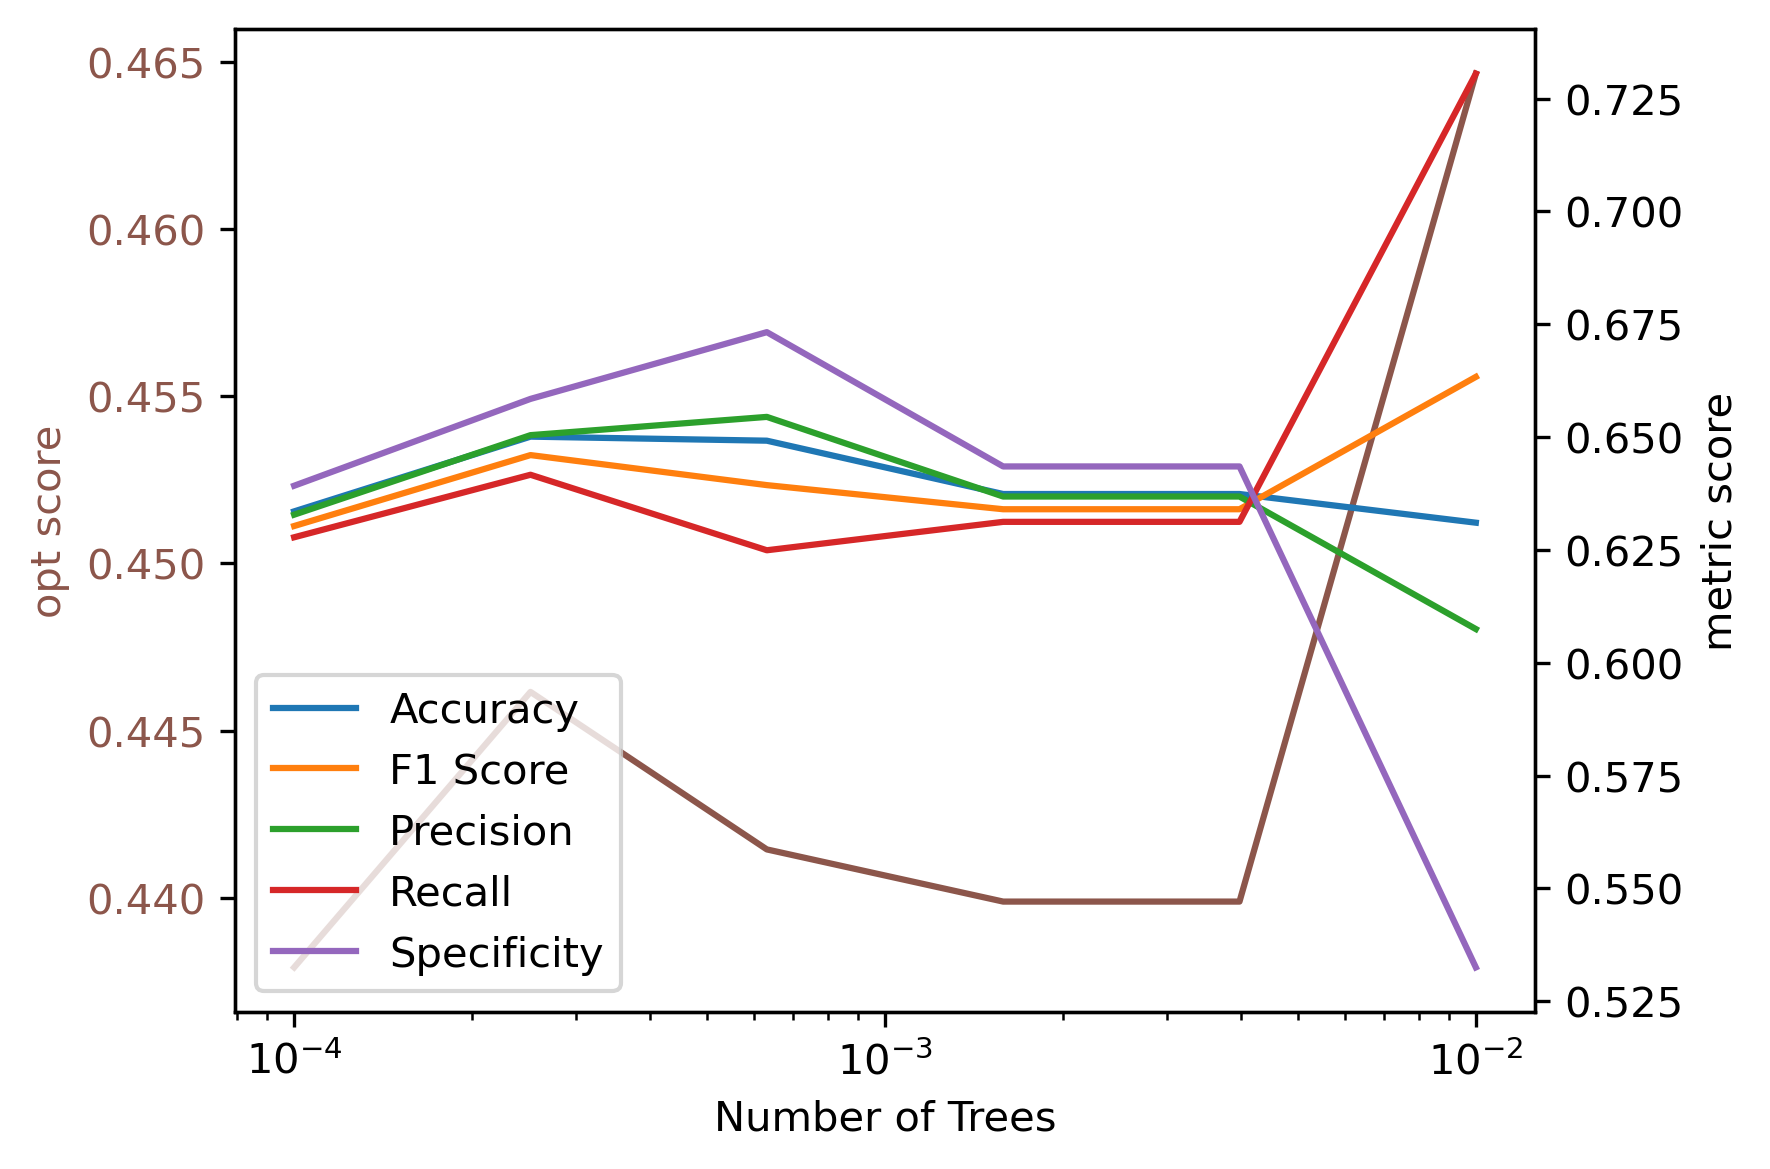

In [31]:
result_2 = pd.DataFrame()

result_2['Number of Trees'] = alpha_grids
result_2['Accuracy'] = accuracies
result_2['Precision'] = precisions
result_2['Recall'] = recalls
result_2['F1 Score'] = f1s
result_2['Specificity'] = specificities
result_2['Opt Score'] = opts

display(result_2)

fig, ax1 = plt.subplots()

color = 'tab:brown'
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('opt score', color=color)
ax1.plot(result_2['Number of Trees'], result_2['Opt Score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('metric score')  # we already handled the x-label with ax1

#ax2.tick_params(axis='y', labelcolor=color)
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity']:
    ax2.plot(result_2['Number of Trees'], result_2[x], label = x)

ax2.legend( loc='lower left')
plt.xscale('log') 
plt.xlabel('alpha')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [6]:
X2_train = np.concatenate([X2_subtrain, X2_valid])
y2_train = np.concatenate([y2_subtrain, y2_valid])

d_tree = DecisionTreeClassifier(ccp_alpha = np.logspace(-4, -2, 6)[3])
d_tree.fit(X2_train, y2_train)
joblib.dump(d_tree, './models/imbalanced/decision_tree')

['./models/imbalanced/decision_tree']

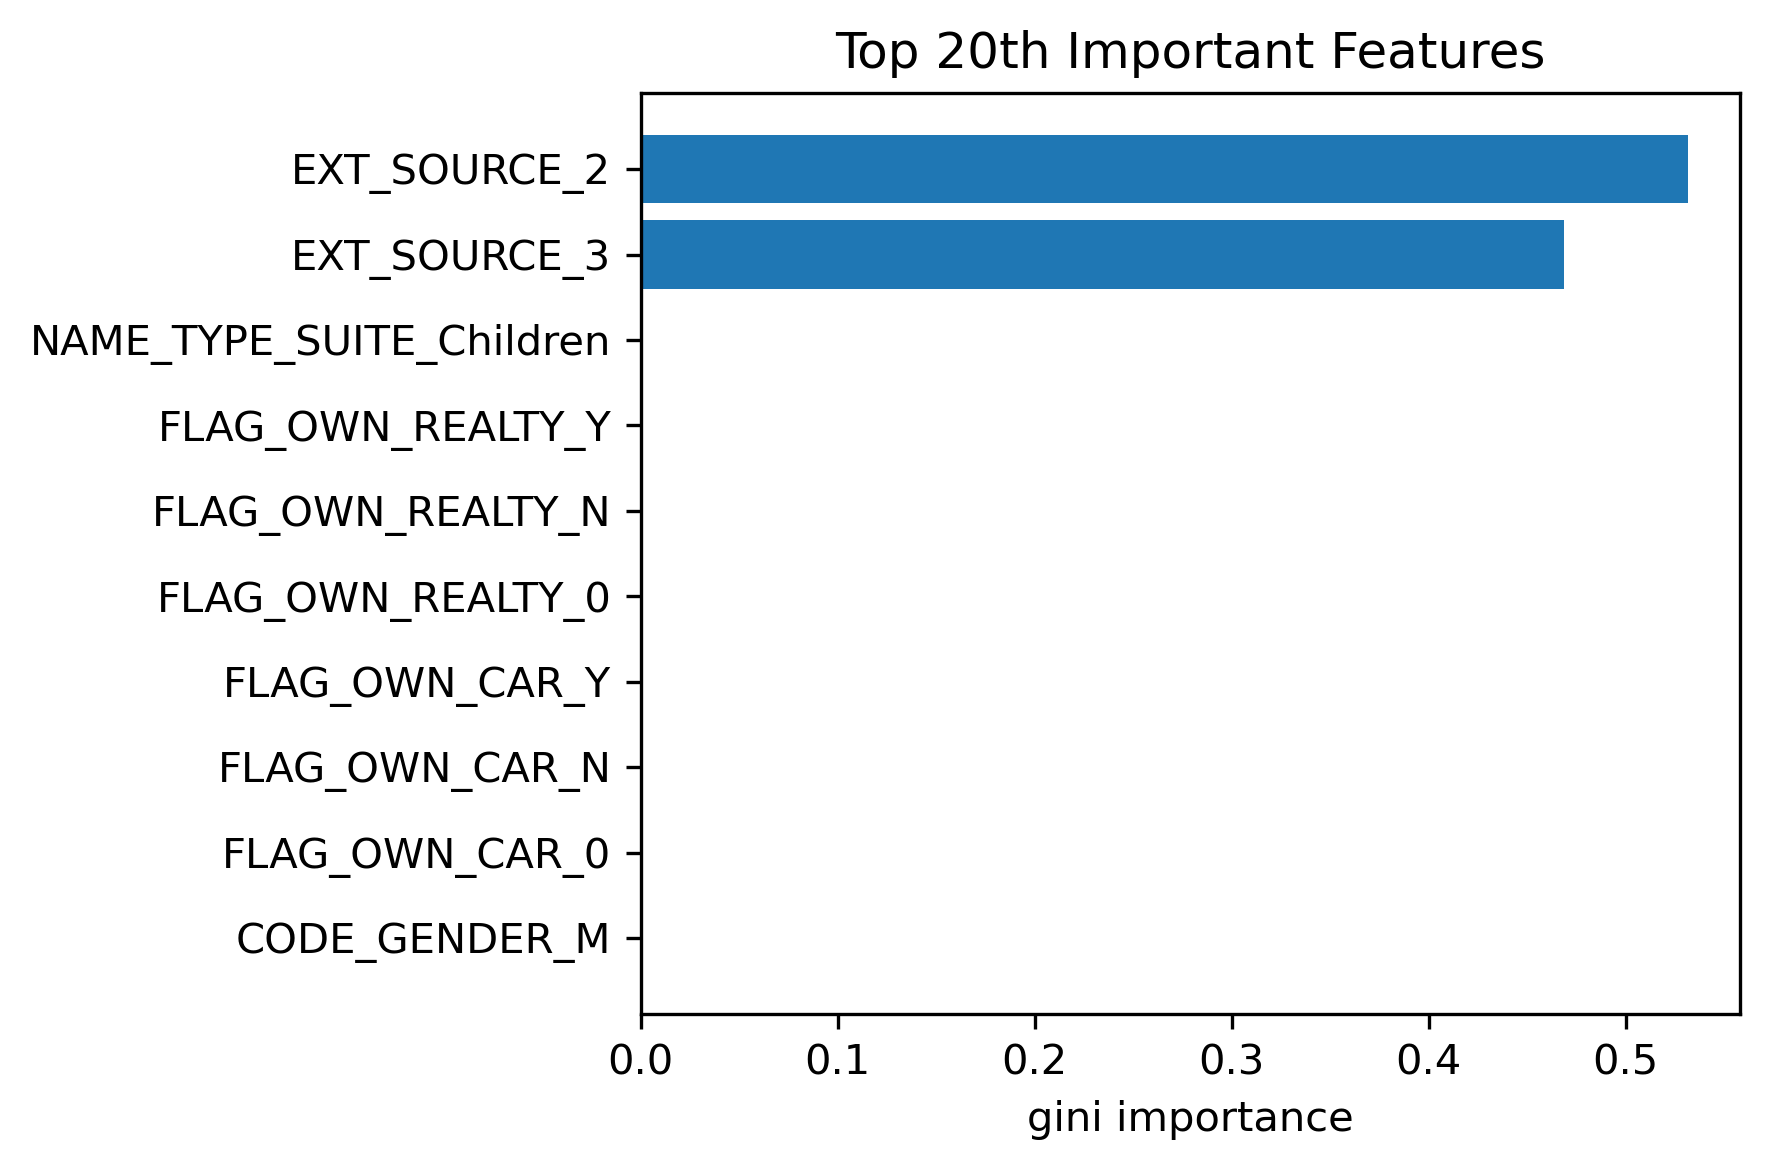

In [49]:
importances = d_tree.feature_importances_
indices = np.argsort(importances)#[::-1]

col_name = X_col

labels = []
gini_im = []
for i in indices[-10:]:
    labels.append(col_name[i])
    gini_im.append(importances[i])
    
#plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 改字體，標題才可以是中文
plt.rcParams['figure.dpi'] = 300
plt.barh(labels, gini_im,)
plt.xlabel('gini importance')
plt.title('Top 20th Important Features')
plt.tight_layout()
plt.savefig('important_features.png', transparent = True)
plt.show()

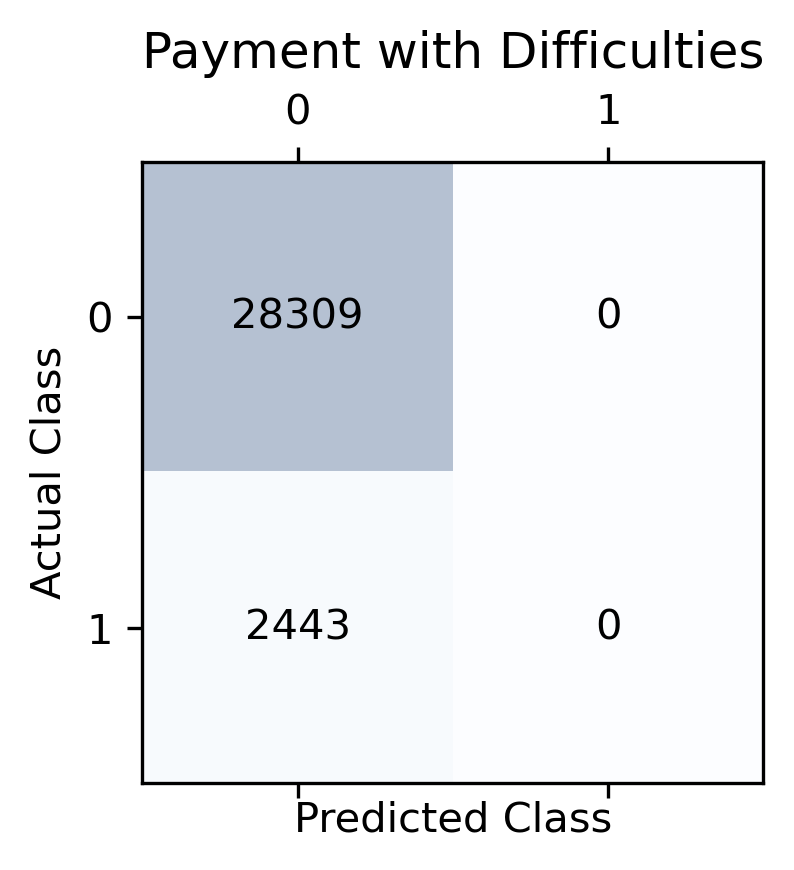

accuracy = 0.9205580124869928
f1_score = 0.0
precision = 0.0
recall = 0.0
specificity = 1.0
opt_score = 0.23424564999999975


C:\Users\Jerome\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
result = d_tree.predict(X2_test)
y_test = y2_test
plt_title = 'Payment with Difficulties'

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=result)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title(plt_title)
plt.tight_layout()
plt.savefig('under_sampling_confusion_matrix.png', transparent = True)
plt.show()


acc = accuracy_score(y_test, result)
f1 = f1_score(y_test, result)
precision = precision_score(y_test, result)
recall = recall_score(y_test, result)
spe = specificity_score(y_test, result)
opt = opt_score(y_test, result)
print('accuracy =', acc)
print('f1_score =', f1)
print('precision =', precision)
print('recall =', recall)
print('specificity =', spe)
print('opt_score =', opt)

AUC: 0.592546


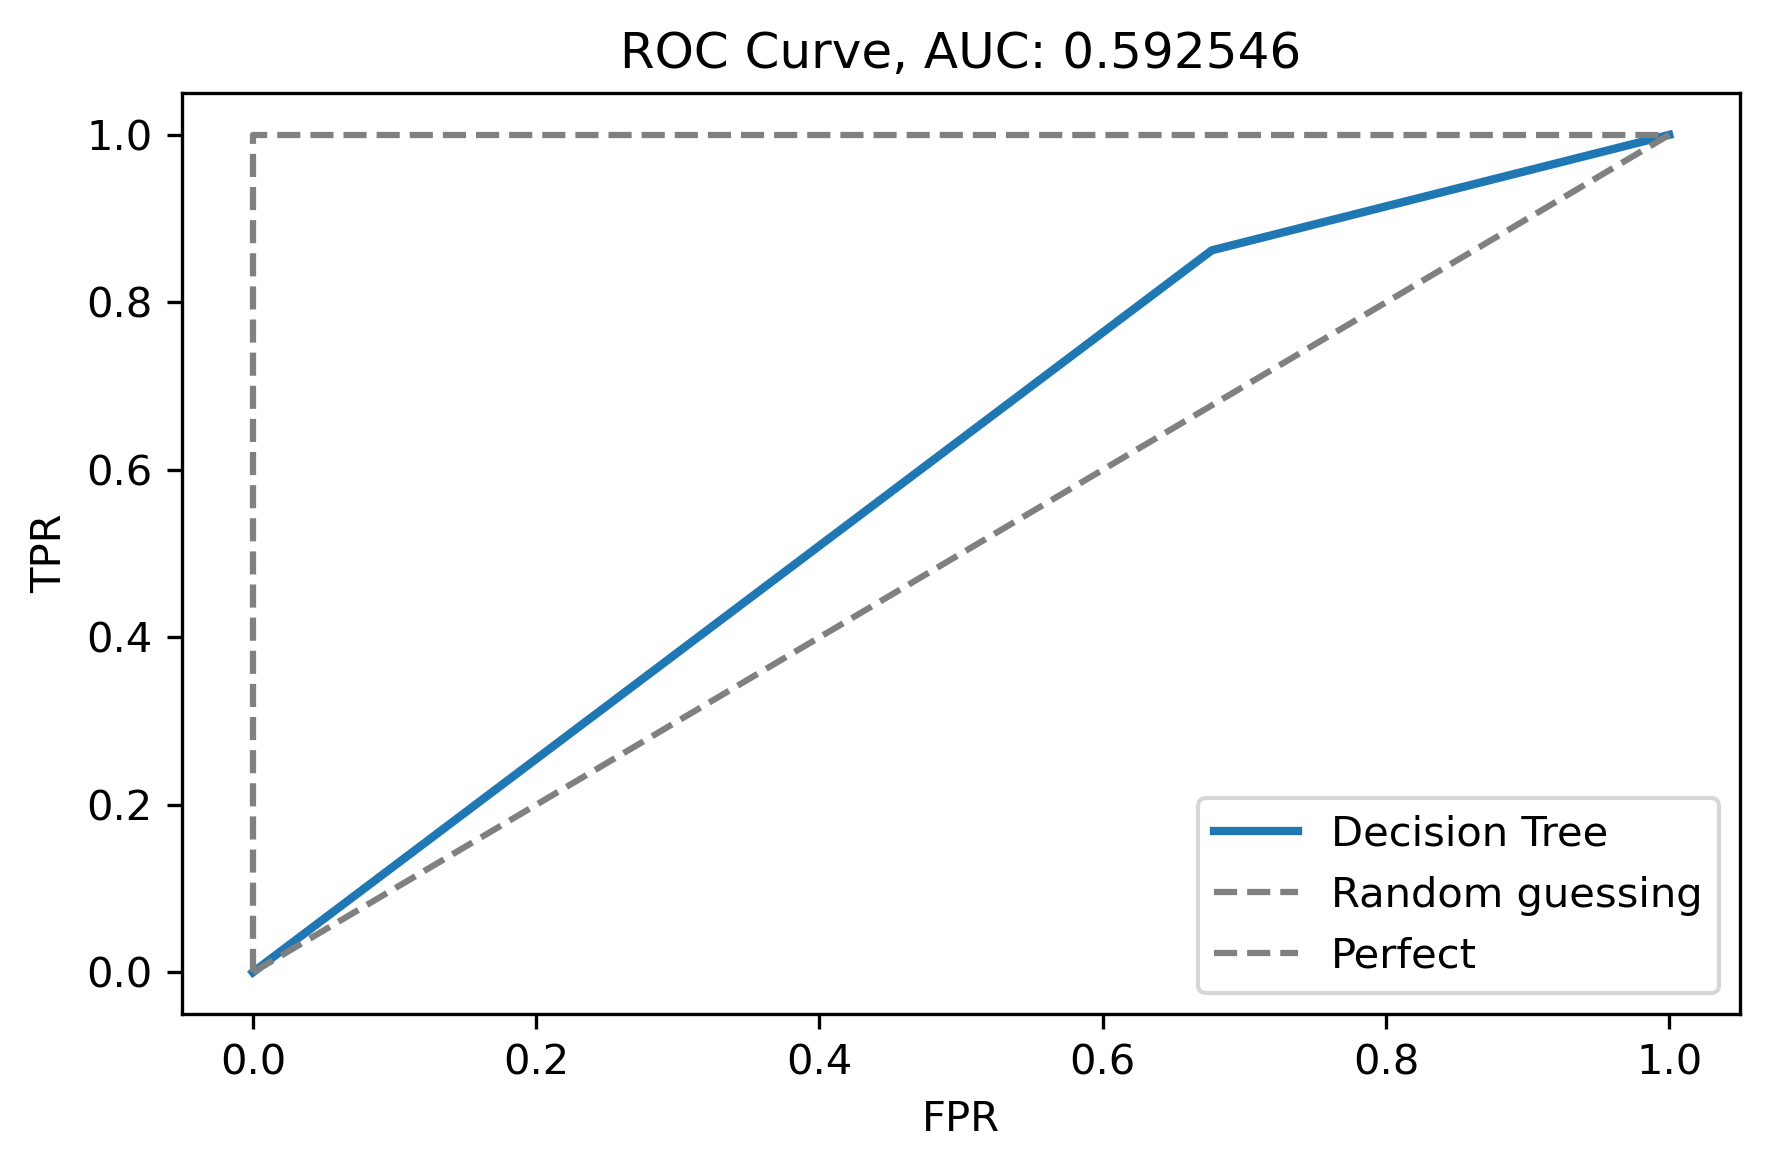

In [51]:
probas = d_tree.predict_proba(X2_test)
y_test = y2_test

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,
                                 probas[:, 0],
                                 pos_label=0)

print('AUC: %f' %(auc(fpr, tpr)))

plt.plot(fpr, tpr, lw=2,
         label='Decision Tree')
    
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color='gray',
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle='--',
         color='gray',
         label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve, AUC: %f' %(auc(fpr, tpr)))
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Balanced Data, Under Sampling

In [32]:
with open('pickle/balanced_data_under_sampling.pickle', 'rb') as f:
    under_data = pickle.load(f)
    
X2_subtrain = under_data['X_subtrain']
X2_valid = under_data['X_valid']
y2_subtrain = under_data['y_subtrain']
y2_valid = under_data['y_valid']
X2_test = under_data['X_test']
y2_test = under_data['y_test']

In [33]:
accuracies = []
recalls = []
f1s = []
precisions = []
opts = []
specificities = []

alpha_grids = np.logspace(-4, -1, 6)
alpha_results = {}
for alpha in alpha_grids:
    d_tree = DecisionTreeClassifier(ccp_alpha = alpha)
    d_tree.fit(X2_subtrain, y2_subtrain)
    prediction = d_tree.predict(X2_valid)
    
    accuracies.append(accuracy_score(y2_valid, prediction))
    recalls.append(recall_score(y2_valid, prediction))
    f1s.append(f1_score(y2_valid, prediction))
    precisions.append(precision_score(y2_valid, prediction))
    specificities.append(specificity_score(y2_valid, prediction))
    opts.append(opt_score(y2_valid, prediction))

C:\Users\Jerome\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Alpha,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,0.000100,0.633548,0.633061,0.626911,0.629971,0.640121,0.437671
1,0.000398,0.651719,0.647194,0.659651,0.653363,0.643862,0.451402
2,0.001585,0.637397,0.636842,0.631229,0.634023,0.643506,0.439881
3,0.006310,0.637397,0.636842,0.631229,0.634023,0.643506,0.439881
4,0.025119,0.610634,0.635751,0.509264,0.565521,0.711028,0.399961
5,0.100000,0.502417,0.000000,0.000000,0.000000,1.000000,0.234246


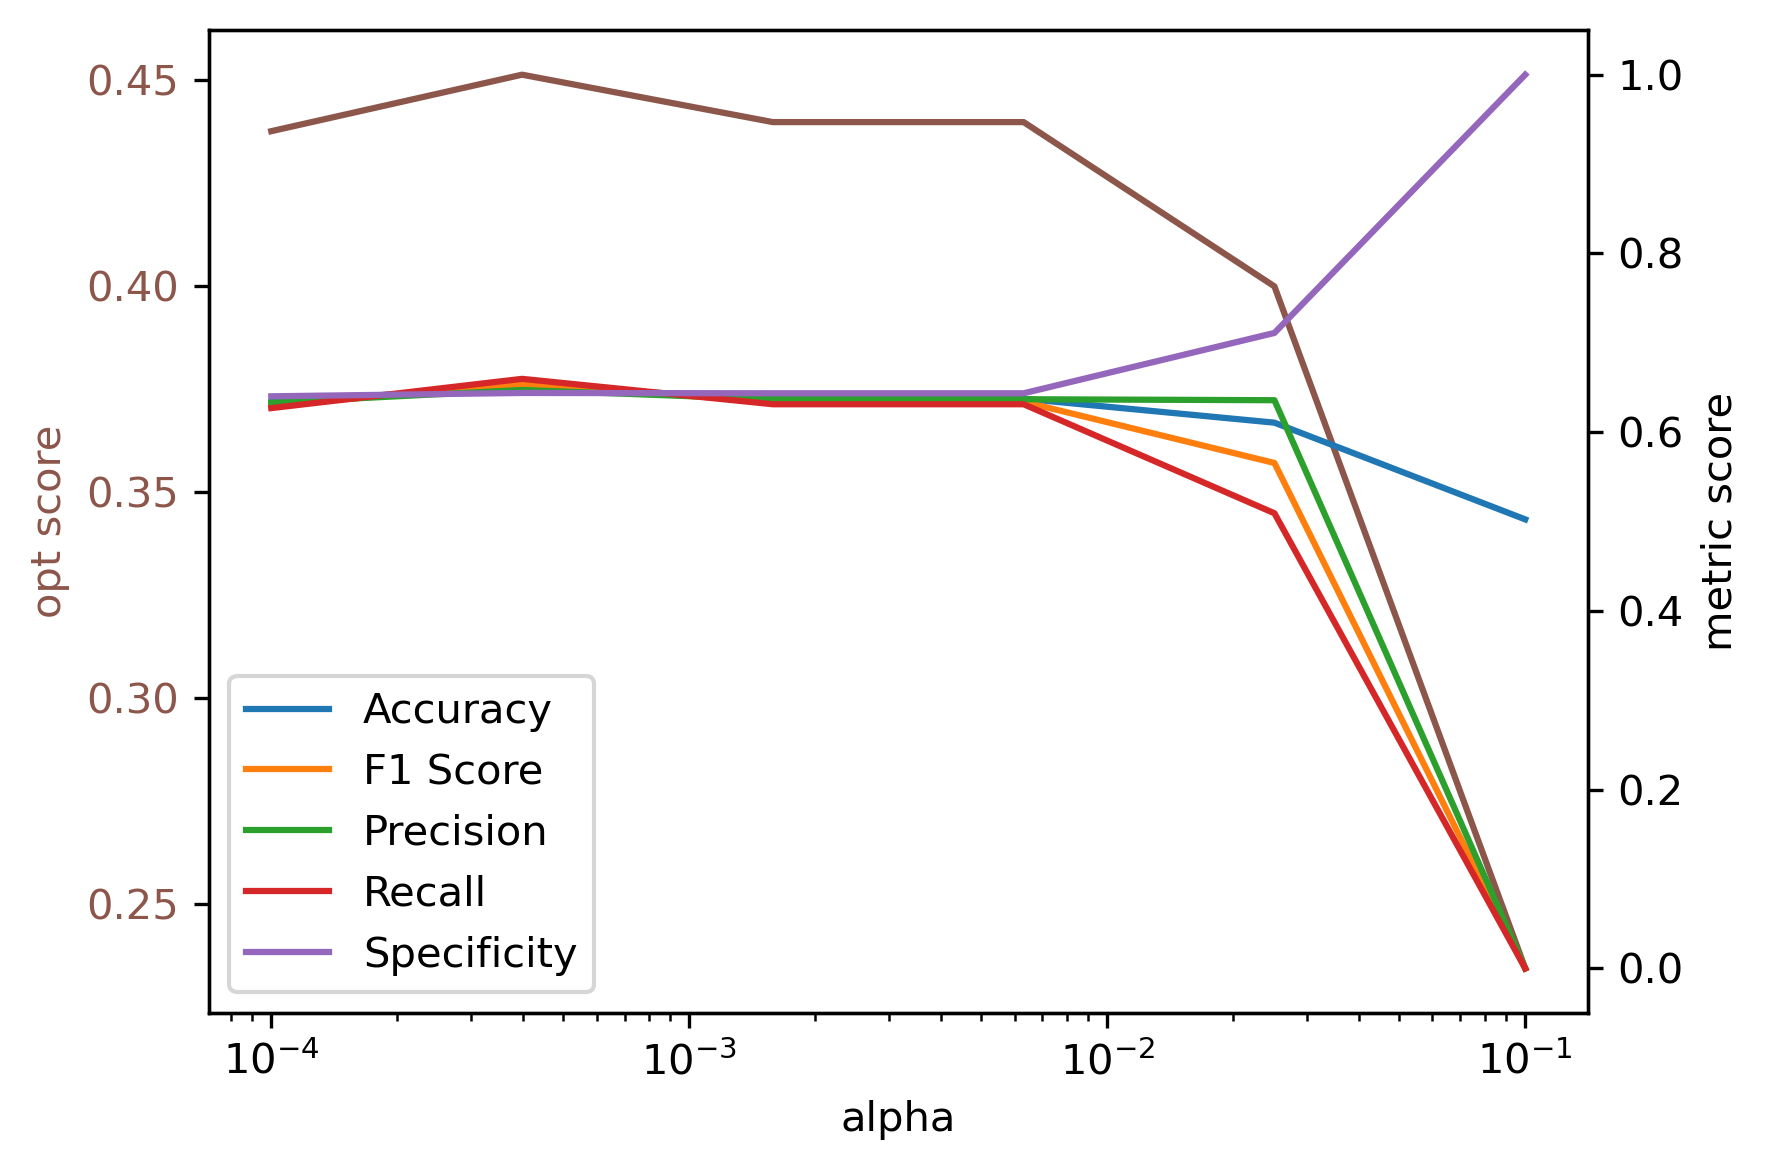

In [34]:
result_2 = pd.DataFrame()

result_2['Alpha'] = alpha_grids
result_2['Accuracy'] = accuracies
result_2['Precision'] = precisions
result_2['Recall'] = recalls
result_2['F1 Score'] = f1s
result_2['Specificity'] = specificities
result_2['Opt Score'] = opts

display(result_2)

fig, ax1 = plt.subplots()

color = 'tab:brown'
ax1.set_xlabel('alpha')
ax1.set_ylabel('opt score', color=color)
ax1.plot(result_2['Alpha'], result_2['Opt Score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('metric score')  # we already handled the x-label with ax1

#ax2.tick_params(axis='y', labelcolor=color)
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity']:
    ax2.plot(result_2['Alpha'], result_2[x], label = x)

ax2.legend( loc='lower left')
plt.xscale('log') 
plt.xlabel('alpha')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [21]:
X2_train = np.concatenate([X2_subtrain, X2_valid])
y2_train = np.concatenate([y2_subtrain, y2_valid])

d_tree = DecisionTreeClassifier(ccp_alpha = np.logspace(-4, -1, 6)[1])
d_tree.fit(X2_train, y2_train)
joblib.dump(d_tree, './models/undersampling/decision_tree_opt2')

['./models/undersampling/decision_tree_opt2']

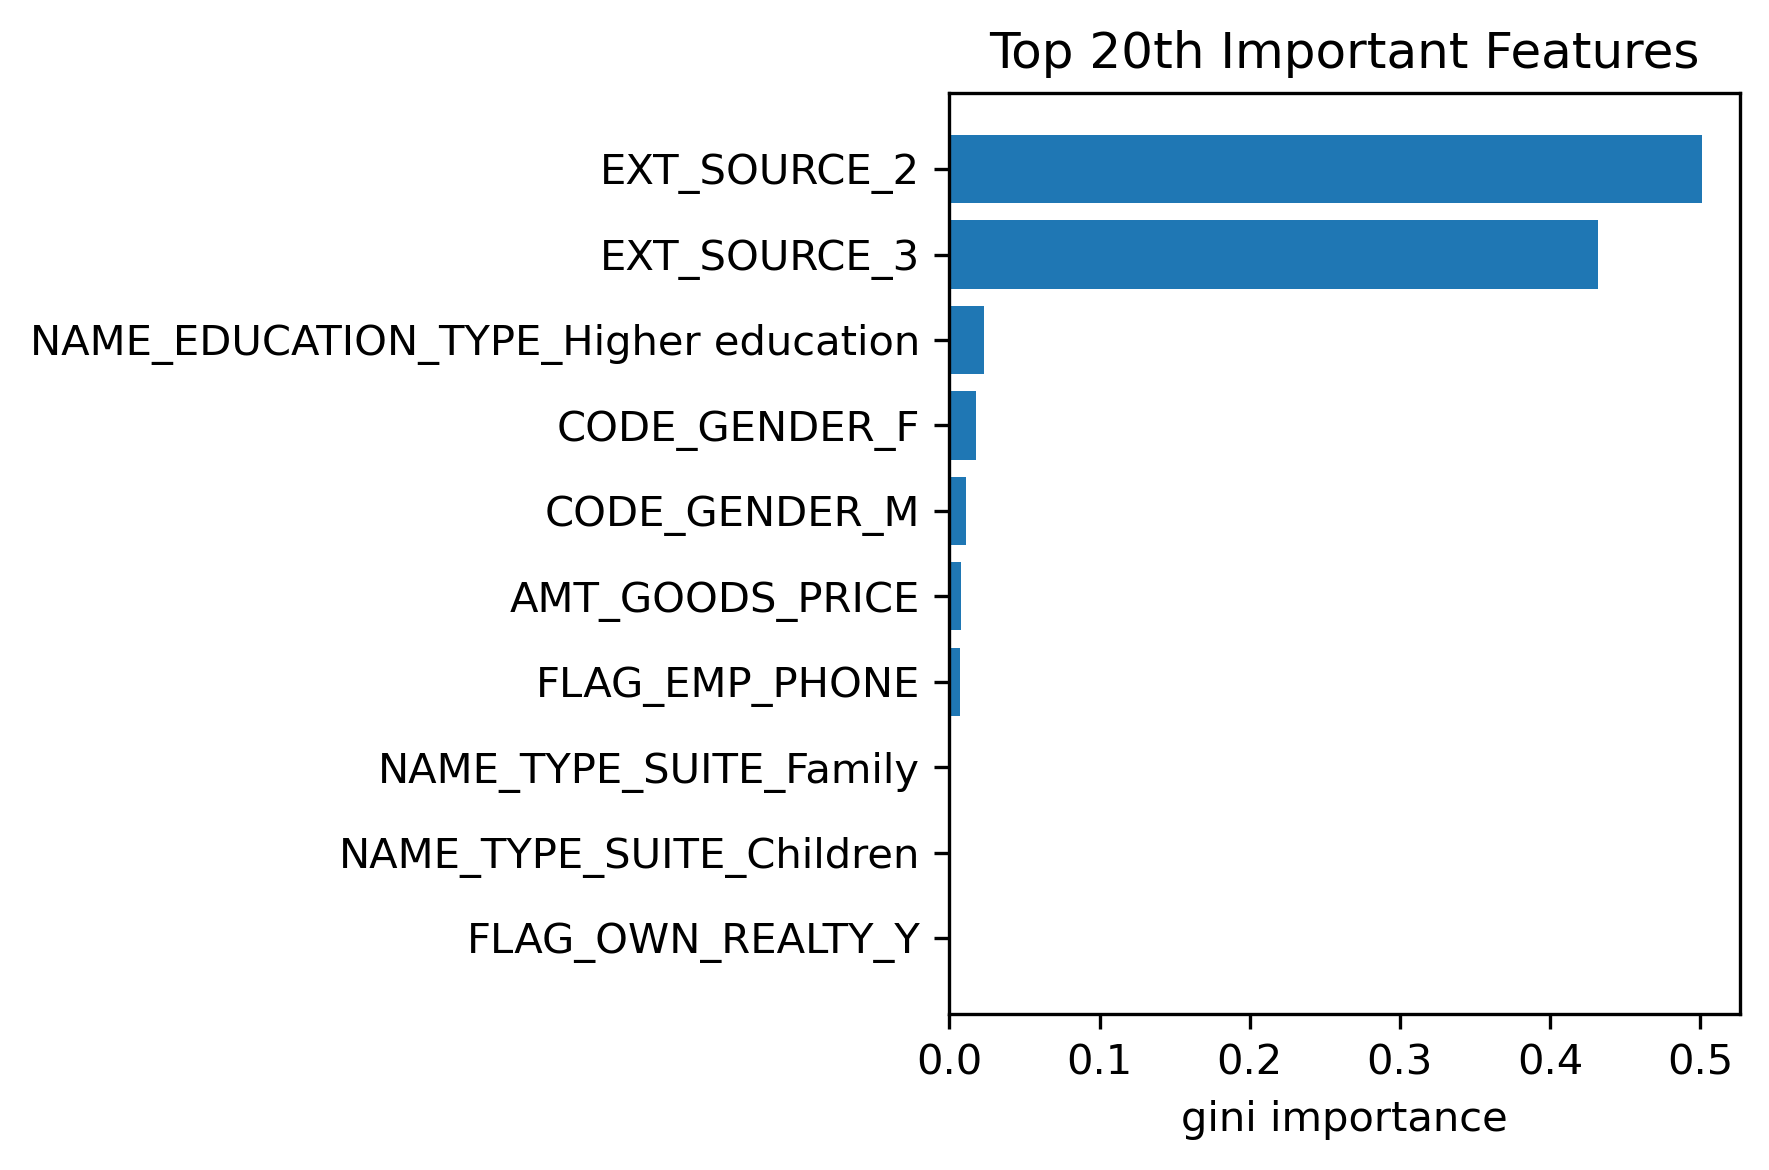

In [22]:
importances = d_tree.feature_importances_
indices = np.argsort(importances)#[::-1]

col_name = X_col

labels = []
gini_im = []
for i in indices[-10:]:
    labels.append(col_name[i])
    gini_im.append(importances[i])
    
#plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 改字體，標題才可以是中文
plt.rcParams['figure.dpi'] = 300
plt.barh(labels, gini_im,)
plt.xlabel('gini importance')
plt.title('Top 20th Important Features')
plt.tight_layout()
plt.savefig('important_features.png', transparent = True)
plt.show()

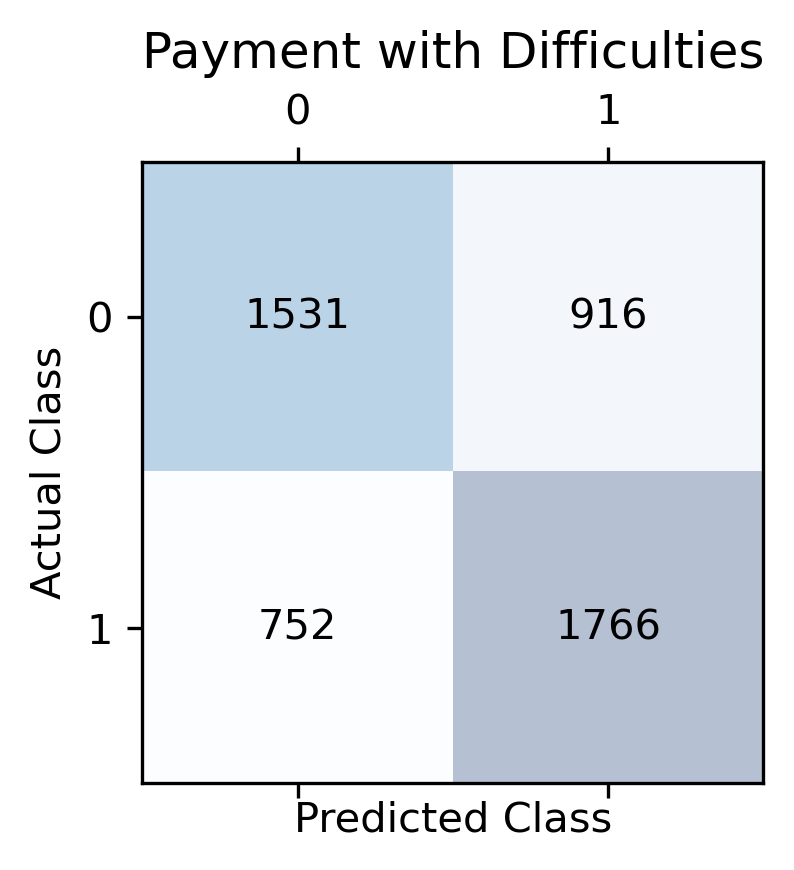

accuracy = 0.66404833836858
f1_score = 0.6792307692307692
precision = 0.6584638329604773
recall = 0.7013502779984114
specificity = 0.6256640784634246
opt_score = -86794.68036253777


In [24]:
result = d_tree.predict(X2_test)
y_test = y2_test
plt_title = 'Payment with Difficulties'

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=result)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title(plt_title)
plt.tight_layout()
#plt.savefig('under_sampling_confusion_matrix.png', transparent = True)
plt.show()


acc = accuracy_score(y_test, result)
f1 = f1_score(y_test, result)
precision = precision_score(y_test, result)
recall = recall_score(y_test, result)
spe = specificity_score(y_test, result)
opt = opt_score2(y_test, result, X2_test)
print('accuracy =', acc)
print('f1_score =', f1)
print('precision =', precision)
print('recall =', recall)
print('specificity =', spe)
print('opt_score =', opt)

AUC: 0.714461


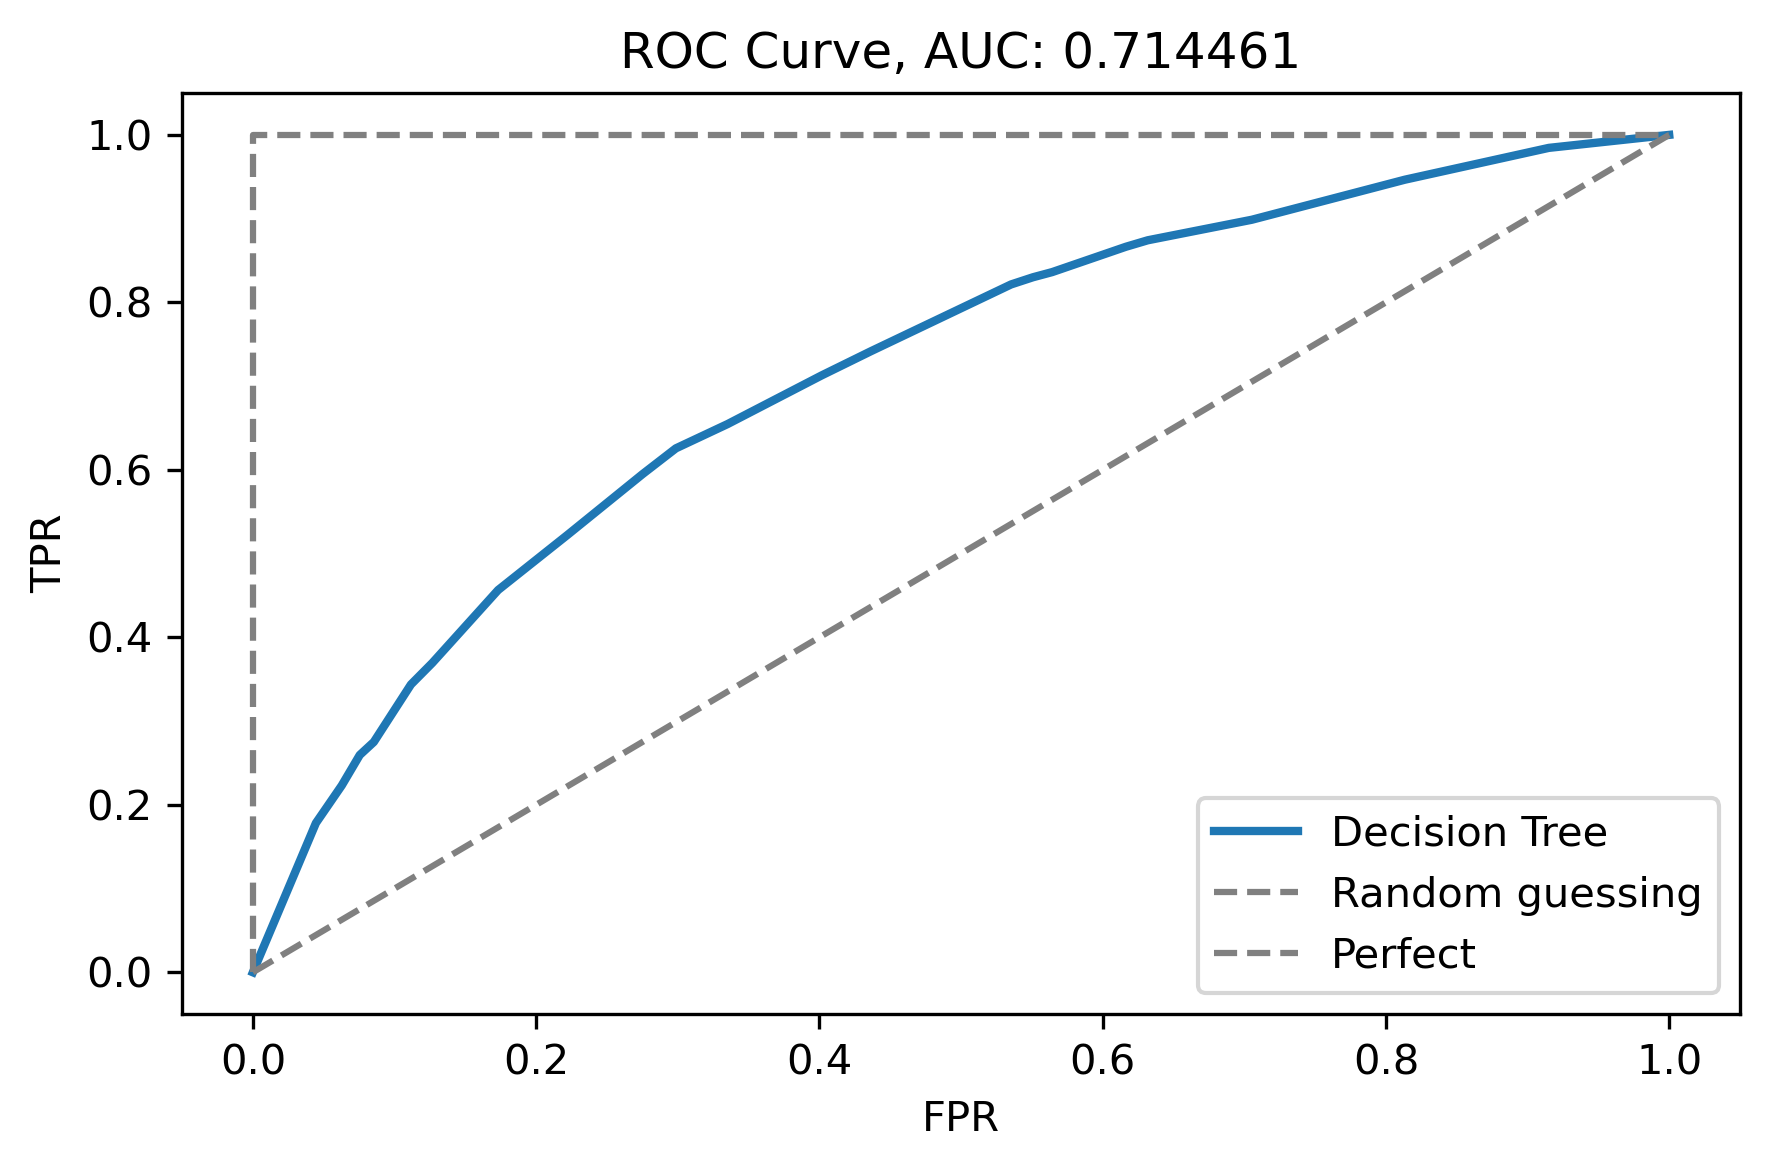

In [25]:
probas = d_tree.predict_proba(X2_test)
y_test = y2_test

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,
                                 probas[:, 0],
                                 pos_label=0)

print('AUC: %f' %(auc(fpr, tpr)))

plt.plot(fpr, tpr, lw=2,
         label='Decision Tree')
    
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color='gray',
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle='--',
         color='gray',
         label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve, AUC: %f' %(auc(fpr, tpr)))
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Balanced Data, Over Sampling

In [35]:
with open('pickle/balanced_data_over_sampling.pickle', 'rb') as f:
    under_data = pickle.load(f)
    
X2_subtrain = under_data['X_subtrain']
X2_valid = under_data['X_valid']
y2_subtrain = under_data['y_subtrain']
y2_valid = under_data['y_valid']
X2_test = under_data['X_test']
y2_test = under_data['y_test']

In [36]:
accuracies = []
recalls = []
f1s = []
precisions = []
opts = []
specificities = []

alpha_grids = np.logspace(-4, -1, 6)
alpha_results = {}
for alpha in alpha_grids:
    d_tree = DecisionTreeClassifier(ccp_alpha = alpha)
    d_tree.fit(X2_subtrain, y2_subtrain)
    prediction = d_tree.predict(X2_valid)
    
    accuracies.append(accuracy_score(y2_valid, prediction))
    recalls.append(recall_score(y2_valid, prediction))
    f1s.append(f1_score(y2_valid, prediction))
    precisions.append(precision_score(y2_valid, prediction))
    specificities.append(specificity_score(y2_valid, prediction))
    opts.append(opt_score2(y2_valid, prediction, X2_valid))

C:\Users\Jerome\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Alpha,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,0.000100,0.659970,0.148235,0.676510,0.243185,0.658517,548.555804
1,0.000398,0.648300,0.143143,0.672931,0.236070,0.646136,429.096307
2,0.001585,0.753731,0.168859,0.522595,0.255245,0.774035,-3035.551848
3,0.006310,0.552372,0.123759,0.747204,0.212347,0.535257,1602.553781
4,0.025119,0.688008,0.131761,0.512304,0.209611,0.703443,-5050.729794
5,0.100000,0.919247,0.000000,0.000000,0.000000,1.000000,-19623.306704


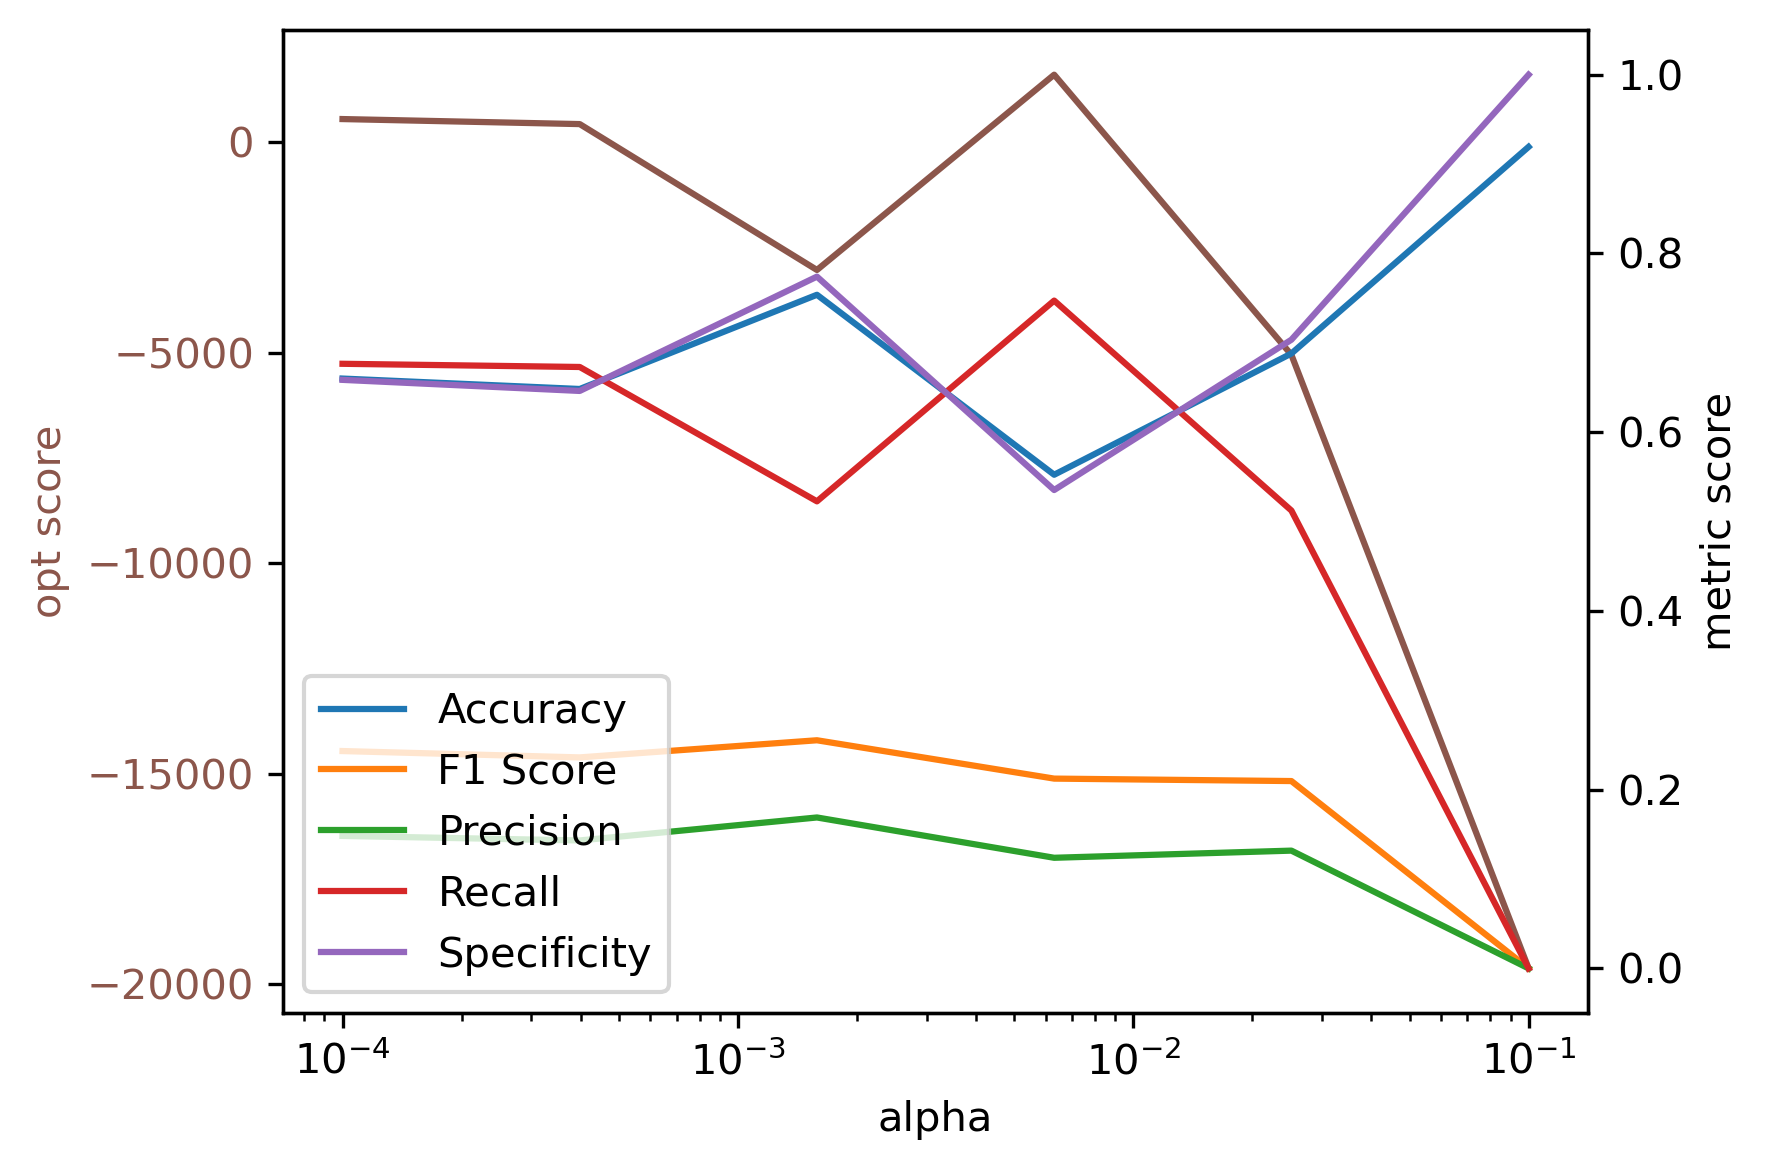

In [38]:
result_2 = pd.DataFrame()

result_2['Alpha'] = alpha_grids
result_2['Accuracy'] = accuracies
result_2['Precision'] = precisions
result_2['Recall'] = recalls
result_2['F1 Score'] = f1s
result_2['Specificity'] = specificities
result_2['Opt Score'] = opts

display(result_2)



fig, ax1 = plt.subplots()

color = 'tab:brown'
ax1.set_xlabel('alpha')
ax1.set_ylabel('opt score', color=color)
ax1.plot(result_2['Alpha'], result_2['Opt Score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('metric score')  # we already handled the x-label with ax1

#ax2.tick_params(axis='y', labelcolor=color)
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity']:
    ax2.plot(result_2['Alpha'], result_2[x], label = x)

ax2.legend( loc='lower left')
plt.xscale('log') 
plt.xlabel('alpha')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [39]:
X2_train = np.concatenate([X2_subtrain, X2_valid])
y2_train = np.concatenate([y2_subtrain, y2_valid])

d_tree = DecisionTreeClassifier(ccp_alpha = np.logspace(-4, -1, 6)[-3])
d_tree.fit(X2_train, y2_train)

joblib.dump(d_tree, './models/oversampling/decision_tree_opt2')

['./models/oversampling/decision_tree_opt2']

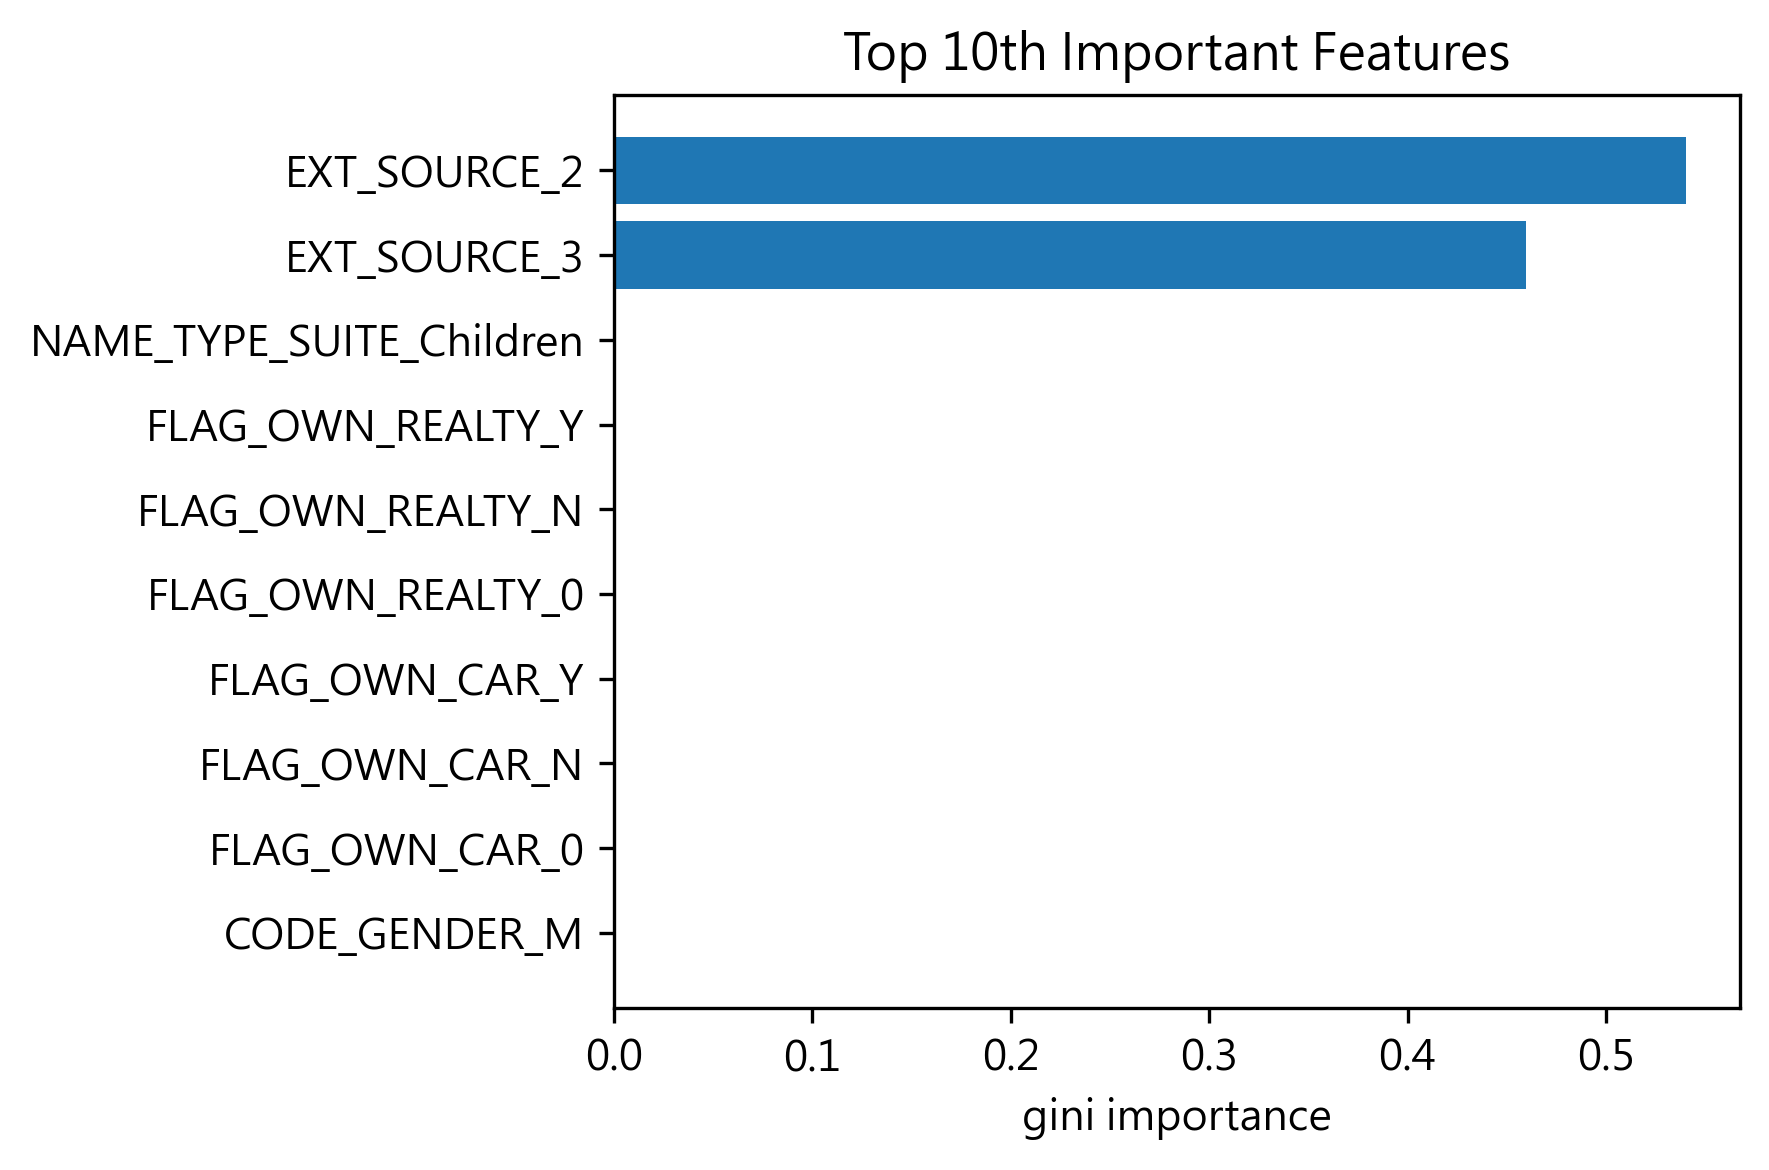

In [30]:
importances = d_tree.feature_importances_
indices = np.argsort(importances)#[::-1]

col_name = X_col

labels = []
gini_im = []
for i in indices[-10:]:
    labels.append(col_name[i])
    gini_im.append(importances[i])
    
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 改字體，標題才可以是中文
plt.rcParams['figure.dpi'] = 300
plt.barh(labels, gini_im,)
plt.xlabel('gini importance')
plt.title('Top 10th Important Features')
plt.tight_layout()
plt.savefig('important_features.png', transparent = True)
plt.show()

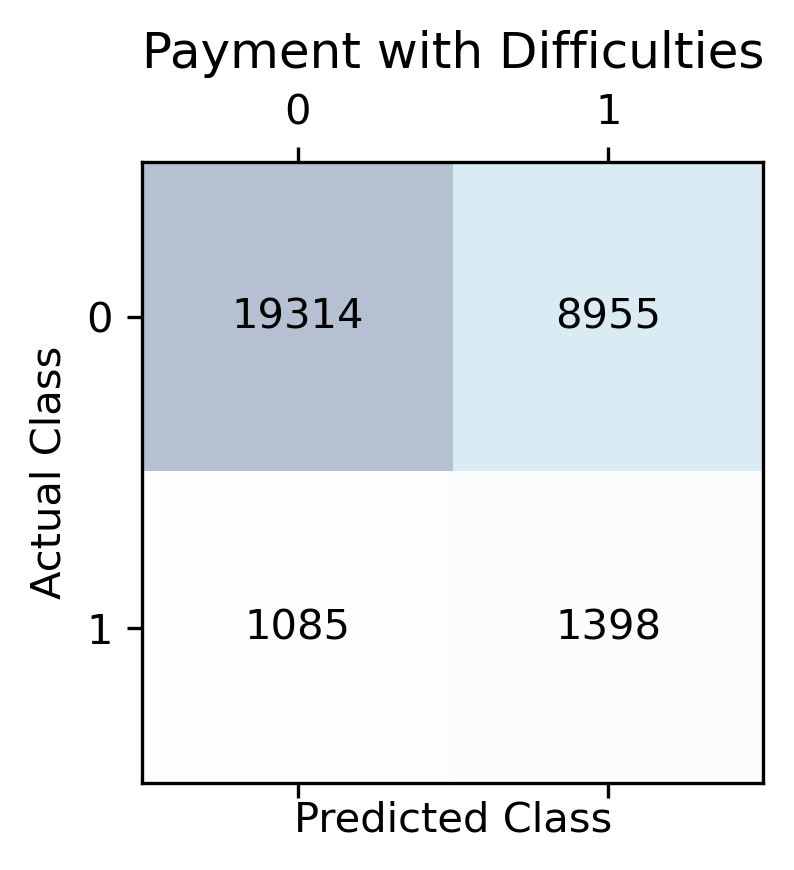

accuracy = 0.6735171696149844
f1_score = 0.21782486755998753
precision = 0.1350333236742973
recall = 0.563028594442207
specificity = 0.6832219038522763
opt_score = 0.4178285894200524


In [27]:
result = d_tree.predict(X2_test)
y_test = y2_test
plt_title = 'Payment with Difficulties'

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=result)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title(plt_title)
plt.tight_layout()
#plt.savefig('under_sampling_confusion_matrix.png', transparent = True)
plt.show()


acc = accuracy_score(y_test, result)
f1 = f1_score(y_test, result)
precision = precision_score(y_test, result)
recall = recall_score(y_test, result)
spe = specificity_score(y_test, result)
opt = opt_score(y_test, result)
print('accuracy =', acc)
print('f1_score =', f1)
print('precision =', precision)
print('recall =', recall)
print('specificity =', spe)
print('opt_score =', opt)

AUC: 0.662417


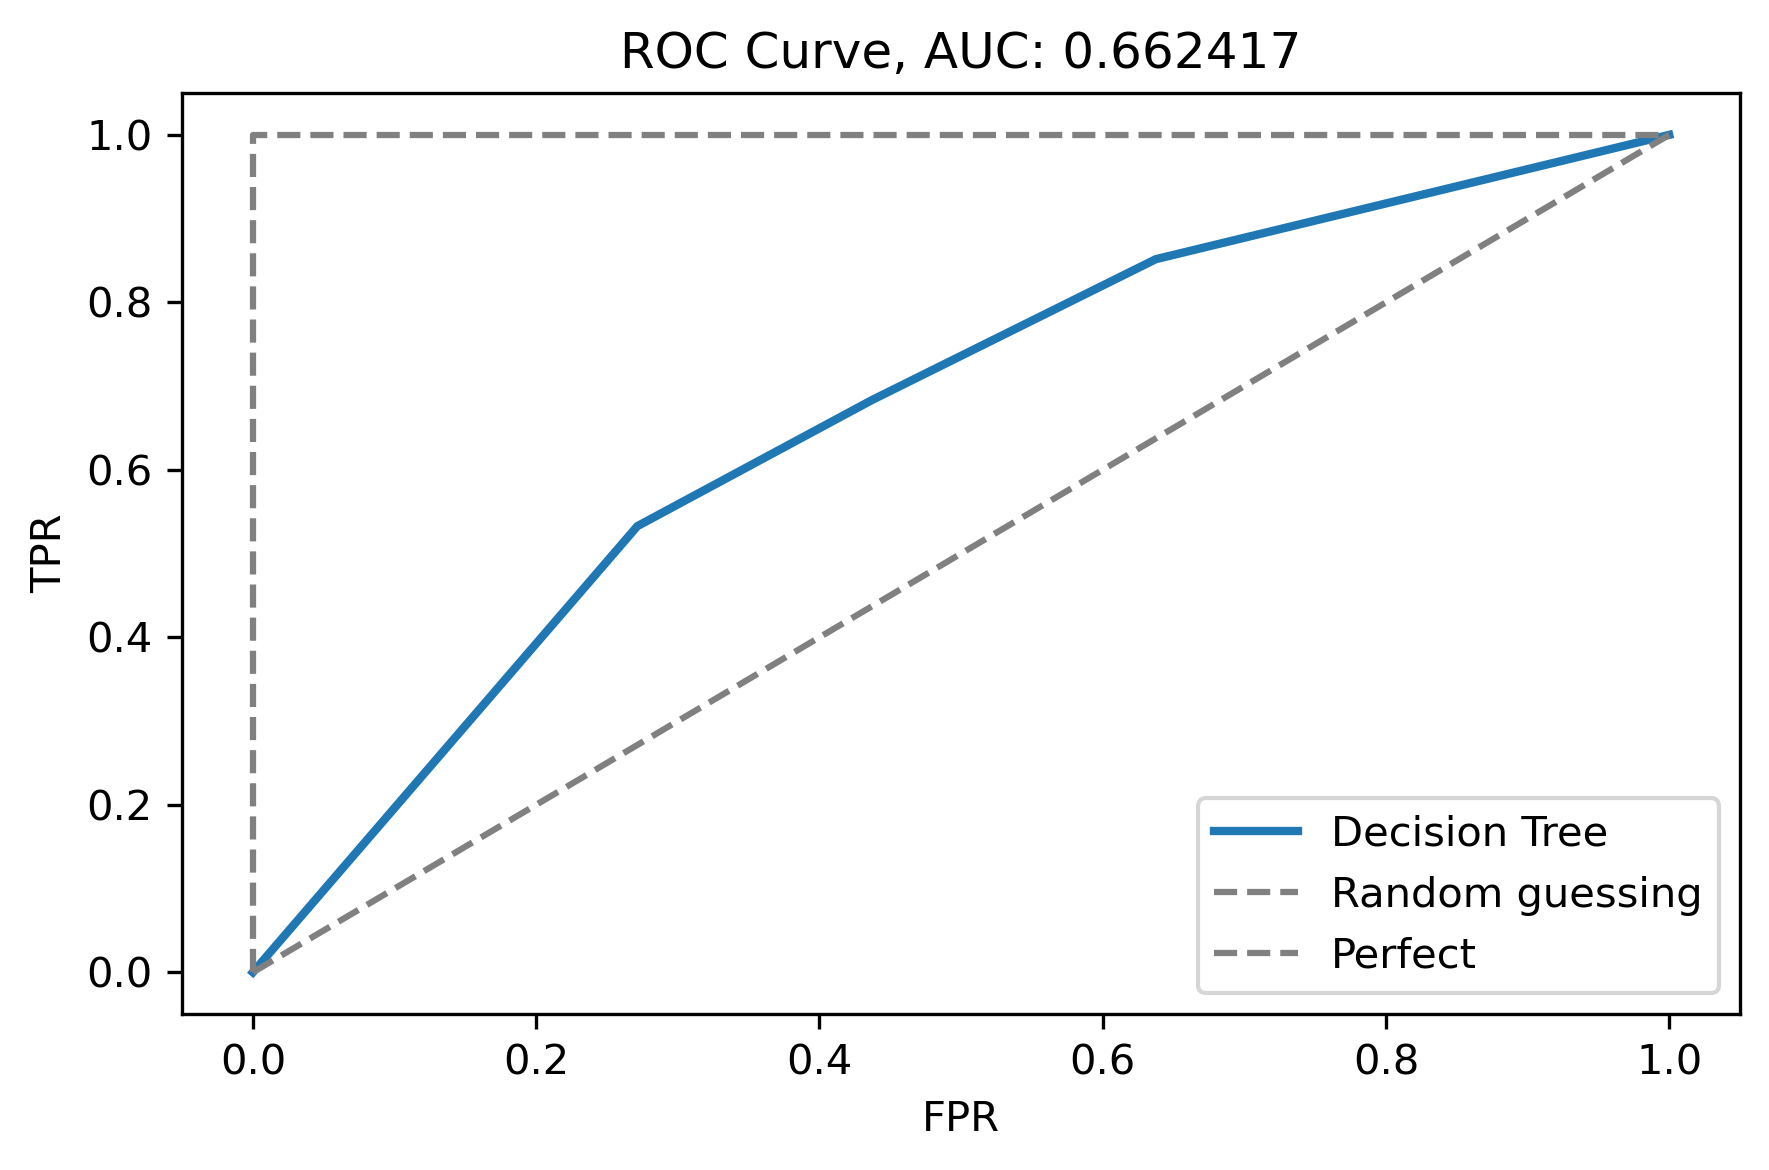

In [28]:
probas = d_tree.predict_proba(X2_test)
y_test = y2_test

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,
                                 probas[:, 0],
                                 pos_label=0)

print('AUC: %f' %(auc(fpr, tpr)))

plt.plot(fpr, tpr, lw=2,
         label='Decision Tree')
    
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color='gray',
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle='--',
         color='gray',
         label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve, AUC: %f' %(auc(fpr, tpr)))
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()